#Conexão com o drive para ter acesso as simulações.

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  COLAB = True
  print("Note: Using Google Colab")
except:
  print("Note: not using Google Colab")
  COLAB = False

Mounted at /content/drive
Note: Using Google Colab


In [ ]:
!ls /content/drive/MyDrive/ColabNotebooks/DATA/localizacao/corrente_bus_8/
# Caso não funcione, executar código abaixo

ABC.txt  AB.txt   AC.txt  BCG.txt  BG.txt
ABG.txt  ACG.txt  AG.txt  BC.txt   CG.txt



---
#Importação de bibliotecas

In [ ]:
import pandas
import numpy as np
import os
from sklearn.model_selection import train_test_split
import scipy.stats as stats

---
#Leitura de dados

###Bus 8

In [ ]:
baseDir = '/content/drive/MyDrive/ColabNotebooks/DATA/localizacao/'
subpasta = 'corrente_bus_8/'

In [ ]:
ABC = pandas.read_csv(baseDir + subpasta + 'ABC.txt',
                      header=None,
                      delimiter=';',
                      dtype=np.float64)
ABC = pandas.DataFrame(ABC).to_numpy()

In [ ]:
ABG = pandas.read_csv(baseDir + subpasta + 'ABG.txt',
                     header=None,
                     delimiter=';')
ABG = pandas.DataFrame(ABG).to_numpy()

In [ ]:
ACG = pandas.read_csv(baseDir + subpasta + 'ACG.txt',
                     header=None,
                     delimiter=';')
ACG = pandas.DataFrame(ACG).to_numpy()

In [ ]:
BCG = pandas.read_csv(baseDir + subpasta + 'BCG.txt',
                     header=None,
                     delimiter=';')
BCG = pandas.DataFrame(BCG).to_numpy()

In [ ]:
AG = pandas.read_csv(baseDir + subpasta + 'AG.txt',
                     header=None,
                     delimiter=';')
AG = pandas.DataFrame(AG).to_numpy()

In [ ]:
BG = pandas.read_csv(baseDir + subpasta + 'BG.txt',
                     header=None,
                     delimiter=';')
BG = pandas.DataFrame(BG).to_numpy()

In [ ]:
CG = pandas.read_csv(baseDir + subpasta + 'CG.txt',
                     header=None,
                     delimiter=';')
CG = pandas.DataFrame(CG).to_numpy()

In [ ]:
AB = pandas.read_csv(baseDir + subpasta + 'AB.txt',
                     header=None,
                     delimiter=';')
AB = pandas.DataFrame(AB).to_numpy()

In [ ]:
AC = pandas.read_csv(baseDir + subpasta + 'AC.txt',
                     header=None,
                     delimiter=';')
AC = pandas.DataFrame(AC).to_numpy()

In [ ]:
BC = pandas.read_csv(baseDir + subpasta + 'BC.txt',
                     header=None,
                     delimiter=';')
BC = pandas.DataFrame(BC).to_numpy()

##Concat

In [ ]:
dados = np.concatenate([ABC, AB, AC, BCG, BG, ABG, ACG, AG, BC, CG])
del(ABC, AB, AC, BCG, BG, ABG, ACG, AG, BC, CG)

#Separação de classes e atributos

In [ ]:
classes = dados[:,0]
atributos = dados[:, 1:]

In [ ]:
classes = classes/100

#Transformação linear

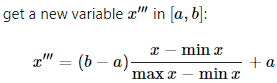

In [ ]:
min = np.min(classes)
print(min)

1.0


In [ ]:
max = np.max(classes)
print(max)

100.0


In [ ]:
classes = 2*((classes-min)/(max-min))-1

##Caminho de volta
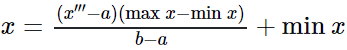

#Separação de fases

In [ ]:
  #parâmetros
  taxa_amostragem = 10000
  frequencia_sistema = 60
  ciclos_pos_falta = 2
  numero_amostras_ciclo = round(taxa_amostragem / frequencia_sistema)
  dados_por_fase = numero_amostras_ciclo*ciclos_pos_falta

#Separação de teste e treino

In [ ]:
#divide os dados em conjuntos de treinamento (50% dos dados), validação (25% dos dados) e teste (25% dos dados)
X_train, X_validation, y_train, y_validation = train_test_split(atributos, classes, test_size=0.4, random_state=42, shuffle=True)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size=0.5, random_state=42, shuffle=True)

#Alteração para o formato de entrada

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 3, dados_por_fase)
X_validation = X_validation.reshape(X_validation.shape[0], 3, dados_por_fase)
X_test = X_test.reshape(X_test.shape[0], 3, dados_por_fase)

#Normalização dos dados de entrada

In [ ]:
X_train = stats.zscore(X_train, axis=1)
X_validation = stats.zscore(X_validation, axis=1)
X_test = stats.zscore(X_test, axis=1)

#Export

In [ ]:
y_train

array([0.58, 0.04, 0.38, ..., 0.39, 0.08, 0.62])

In [ ]:
os.remove(baseDir + '/y_train')
os.remove(baseDir + '/y_validation')
os.remove(baseDir + '/y_test')
y_train.tofile(baseDir + '/y_train', sep='', format='%s')
y_validation.tofile(baseDir + '/y_validation', sep='', format='%s')
y_test.tofile(baseDir + '/y_test', sep='', format='%s')

In [ ]:
os.remove(baseDir + '/X_train')
os.remove(baseDir + '/X_validation')
os.remove(baseDir + '/X_test')
X_train.tofile(baseDir + '/X_train', sep='', format='%s')
X_validation.tofile(baseDir + '/X_validation', sep='', format='%s')
X_test.tofile(baseDir + '/X_test', sep='', format='%s')

In [ ]:
X_train.shape

(100800, 3, 334)